<a href="https://colab.research.google.com/github/desireedisco/MSDS-Machine-Learning-Supervised/blob/main/0_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fake New Classification - Supervised Machine Learning Project**

---
##Project Topic and Data Source
---

###Project Description

Fake news can mislead people and create polarization in society. I am often surprised how different people can believe different realities which can be traced to the sources of information they are exposed to and where they are receiving the information. Social media algorithms amplify this issue by enabling the targeting misinformation to specific subsets of the population. Confirmation bias plays a role in reinforcing existing beliefs by encouraging people to stay in echo chambers on social media. People don't have time to fact check all the information spreading around social media sites, so having tools to flag potential fake news and redirecting users to fact-checked information would be useful. It would also help if the tools could highlight bias and emotional triggers in the information presented. Social media sites can also label information that is high-quality and factual. Social media sites can also provide opposing viewpoints and help the reader be exposed to a range of viewpoints to reduce the effects of echo chambers.

**My project is focused on understanging the natural language processing and machine learning techniques to help identify false information.**

###Citation of Dataset and other Relevant Links

**The dataset I used can be located at:**
Verma, P. K., Agrawal, P., & Prodan, R. (2021). WELFake dataset for fake news detection in text data (Version 0.1) [Dataset]. Zenodo. https://doi.org/10.5281/ZENODO.4561252

**The kaggle link to the same dataset is here:** https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

**There is also a corresponding paper which utilizes the dataset which can be found here:**
Verma, P. K., Agrawal, P., Amorim, I., & Prodan, R. (2021). WELFake: Word Embedding Over Linguistic Features for Fake News Detection. In IEEE Transactions on Computational Social Systems (Vol. 8, Issue 4, pp. 881–893). Institute of Electrical and Electronics Engineers (IEEE). https://doi.org/10.1109/tcss.2021.3068519

###Type of Learning and Type of Task

The project uses **supervised machine learning** which means that the training data and test data is labeled. The project will focus on **classification** models because we have discrete labels for the data such as 'fake' and 'real'.

###Steps

1. Data Cleaning/Preprocessing
2. Explorator Data Analysis (EDA)
3. Converting text into Vectors
4. Model training, Evaluation, and Prediction
5. Next steps, future improvements


###Data Information

**The WELFake dataset consists of 72,134 news articles with 35,028 real and 37,106 fake articles. The dataset is a merged dataset from four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political).**

The text data can be considered sequential because the order of words is essential for conveying meaning. There is context dependency, so the meaning of a word often relies on the words around it. However, during preprocessing, I added some tabulated data related to the textual data. Additionally, vectorization, a common step in machine learning pipeline, treats a text passage more like a large tabular dataset by converting it into numerical features and essentially ignoring the context and order of words. We will look at this issue more when we look at the vectorization methods used.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# read csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning - Supervised Learning/project/ProjectData/WELFake_Dataset.csv')
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


**Note on matching Real and Fake labels:**
In the dataset description the authors state that there are 72,134 news articles with 35,028 real and 37,106 fake news articles. The authors then go on to state the labels are labeled as follows: 0=fake and 1=real. The two statements are contradictory based on the following label counts. Upon further inspection of the data and following the authors first statement of '35,028 real and 37,106 fake news articles', I am following the mapping for the labels as 0=real and 1=fake.

In [5]:
# show the number of rows labeled 1 and number of rows labeled 0
print(data['label'].value_counts())

label
1    37106
0    35028
Name: count, dtype: int64


---
##Data Cleaning
---

**Things I did to clean/preprocess the data**



> ***See notebook 1_DataProcessing for details***



* Load file, drop index, drop na, drop duplicates
* Separate out the email links, weblinks, hashtag, mentions.
* Clean the data leakage problem in the text column. There was also some minor problems in the title column that I fixed.
* Count the number of sentences and calculate the mean sentence length.
* Drop the foreign language rows as determined by langdetect
* Check to see of the remaining tokens which are recognized as words and calculated the non-recognized word percentage
* Calculate the title and text similarity
* Save the data as csv for easy loading later

**The cleaned data file is DataClean.csv**

In [6]:
#read csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning - Supervised Learning/project/ProjectData/DataClean.csv')
data.head()

,title,text,label,title_clean,text_clean,email,links,link_count,mentions,mentions_count,...,text_tokens_to_text,recog_words_to_text,text_not_words,not_ascii,non_ascii_count,non_recog_word_count,total_word_count,non_word_percent,text_clean_ascii,title_text_similarity
0,Prosecutors argue against prison time for New ...,NEW YORK (Reuters) - The mastermind of the “Br...,0,Prosecutors argue against prison time for New ...,The mastermind of the “Bridgegate” lane closur...,NaN,NaN,0,NaN,0,...,mastermind bridgegate lane closure scandal hel...,mastermind bridgegate lane closure scandal hel...,{'christie'},set(),0,1,1857,0.053850,mastermind bridgegate lane closure scandal hel...,0.7181
1,Is Obama preparing a parting shot on Israel? T...,"Print \nLast week, the UN’s premier cultural a...",1,Is Obama preparing a parting shot on Israel? T...,"Print Last week, the UN’s premier cultural ag...",NaN,NaN,0,NaN,0,...,print last week un premier cultural agency une...,print last week un premier cultural agency app...,{'unesco'},set(),0,1,864,0.115741,print last week un premier cultural agency une...,0.3405
2,HOLLYWOOD RICH AND FAMOUS Shafted By “Sick” Hi...,Hillary Clinton s campaign charged up to a hun...,1,HOLLYWOOD RICH AND FAMOUS Shafted By “Sick” Hi...,Hillary Clinton s campaign charged up to a hun...,NaN,NaN,0,NaN,0,...,hillary clinton campaign charged hundred thous...,hillary clinton campaign charged hundred thous...,"{'hrc', 'tmz', 'von'}",set(),0,3,620,0.483871,hillary clinton campaign charged hundred thous...,0.6129
3,Hillary Wants Aggressively Interventionist For...,10-27-1 6 The first Bill and Hillary Clinton c...,1,Hillary Wants Aggressively Interventionist For...,10-27-1 6 The first Bill and Hillary Clinton c...,['lendmanstephen@sbcglobal.net'],['http://www.claritypress.com/LendmanIII.html'...,4,NaN,0,...,first bill hillary clinton co presidency inclu...,first bill hillary clinton co presidency inclu...,"{'mps', 'lendman', 'ww', 'renseradio'}",set(),0,4,2590,0.154440,first bill hillary clinton co presidency inclu...,0.6677
4,Donald Trump Says Drugs Are ‘Big Factor’ in Ur...,PITTSBURGH — Donald J. Trump said Thursday ...,0,Donald Trump Says Drugs Are ‘Big Factor’ in Ur...,PITTSBURGH — Donald J. Trump said Thursday ...,NaN,NaN,0,NaN,0,...,pittsburgh donald trump said thursday drugs bl...,pittsburgh donald trump said thursday drugs bl...,set(),set(),0,0,2721,0.000000,pittsburgh donald trump said thursday drugs bl...,0.6466


In [7]:
# fill na with '' incase we want to vectorize latter
# I also need to fill because I look at top mentions and hashtag in EDA
data.loc[:,'mentions'] = data.loc[:,'mentions'].fillna('')
data.loc[:,'hashtags'] = data.loc[:,'hashtags'].fillna('')

---
##Exploratory Data Analysis (EDA)
---

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

###Label Distribution

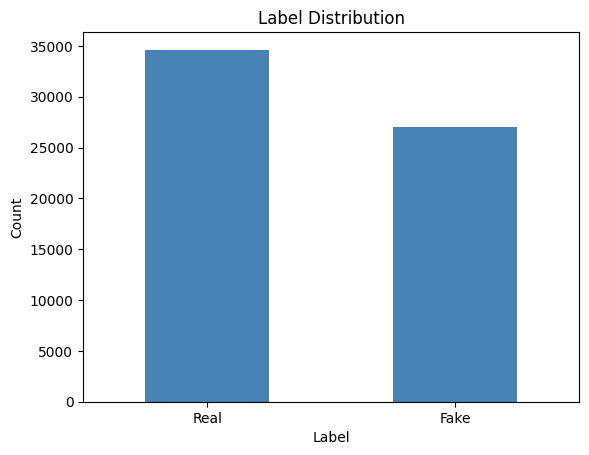

In [9]:
# display value counts
data['label'].value_counts().plot(kind='bar', xlabel='Label', ylabel='Count', color='steelblue', title='Label Distribution')
plt.xticks([0, 1], ['Real', 'Fake'], rotation = 0)
plt.show()

###Sentence Count and Mean Sentence Length Distribution

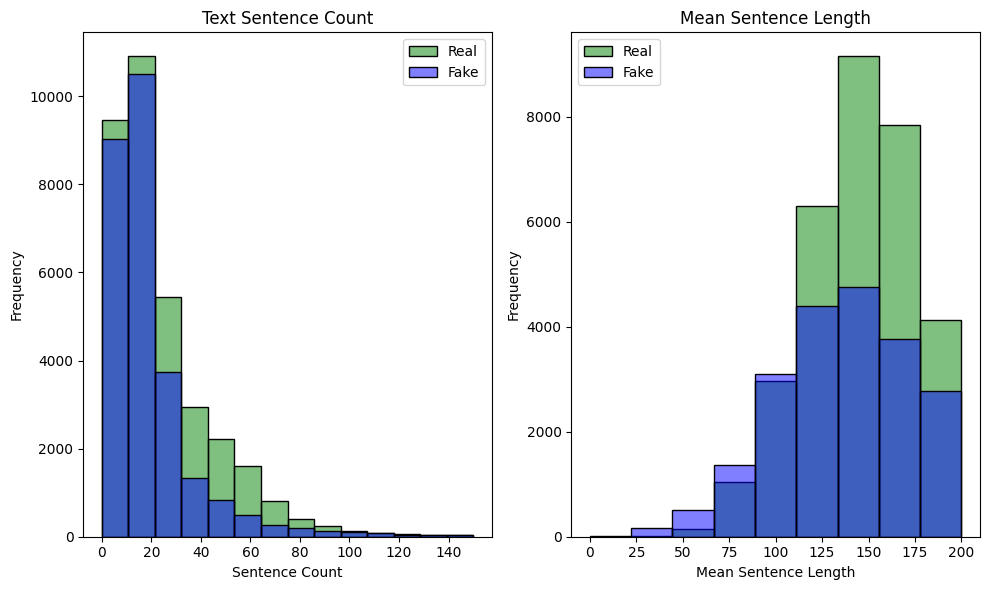

In [10]:
# distribution of sentence count and mean sentence length for real and fake news articles using histograms
# subplots
fig, (ax1, ax2) = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)

# use bins to make the histogram simpler
bins = np.linspace(0, 150, 15)
# used alpha to see how colors overlap
sns.histplot(data.loc[data['label']==0,'text_sent_count'], bins=bins, ax=ax1, color='green', alpha=0.5, label='Real')
sns.histplot(data.loc[data['label']==1,'text_sent_count'], bins=bins, ax=ax1, color='blue', alpha=0.5, label='Fake')
ax1.set_xlabel('Sentence Count')
ax1.set_ylabel('Frequency')
ax1.title.set_text('Text Sentence Count')
ax1.legend(loc="upper right")

# use bins to make the histogram simpler
bins = np.linspace(0, 200, 10)
# used alpha to see how colors overlap
sns.histplot(data.loc[data['label']==0,'mean_sent_length'], bins=bins, ax=ax2, color='green', alpha=0.5, label='Real')
sns.histplot(data.loc[data['label']==1,'mean_sent_length'], bins=bins, ax=ax2, color='blue', alpha=0.5, label='Fake')
ax2.set_xlabel('Mean Sentence Length')
ax2.set_ylabel('Frequency')
ax2.title.set_text('Mean Sentence Length')
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()

**The real articles have a greater sentence count and mean sentence length. Looking through the data it appears most of the fake news articles are more similar to tweets than actual articles.**

###Title Text Similarity Distribution

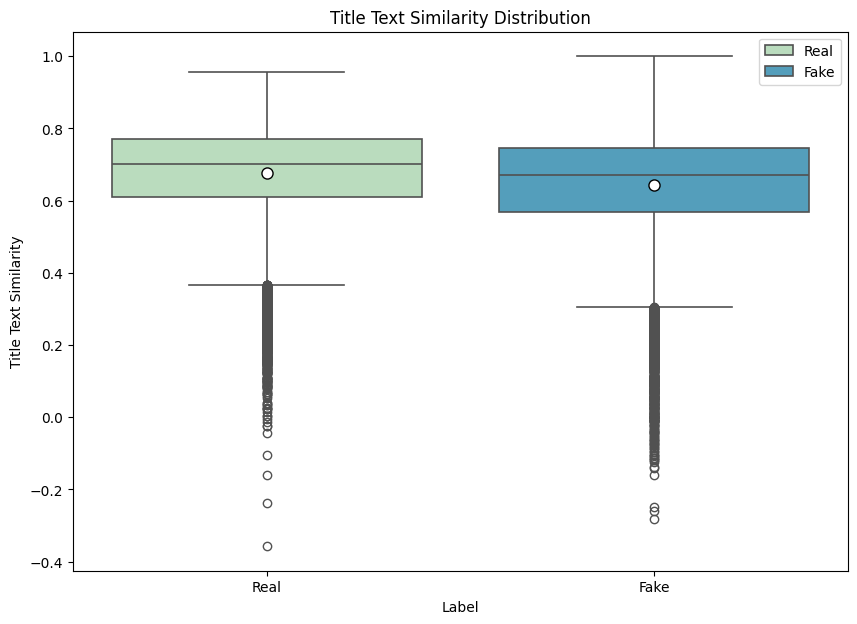

In [11]:
# distribution of tit_text_similarity score using histogram
fig, ax = plt.subplots(figsize=(10, 7))

# used boxplot to see the difference in similarity scores between labels
sns.boxplot(x='label', y='title_text_similarity', data=data, hue='label',
            palette='GnBu', linewidth=1.2, showmeans=True,
            meanprops={'marker':'o', # used meanprops to show mean
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'8'}, ax=ax)
ax.set_xlabel('Label')
ax.set_ylabel('Title Text Similarity')
ax.set_title('Title Text Similarity Distribution')
plt.xticks([0, 1], ['Real', 'Fake'], rotation = 0)

# had to do this for legend labels to show correctly
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Real', 'Fake'])

plt.show()

**The real articles have a slightly higher mean title_text_similarity**

I would like the value would be a little higher for the real articles. I expected more of a difference between real and fake.

In [12]:
# check how title_text_similarity compare based on label
print(data.loc[data['label']==0, 'title_text_similarity'].mean())
print(data.loc[data['label']==1, 'title_text_similarity'].mean())

0.6771524150681766
0.6432999629382551


###Get Top Words in Title and Text

In [13]:
# method to get top 10 words - use Counter
def get_top_n_words(label, column, n=None):
  # list containing all the extracted tokens
  token_collection = [token for text in data.loc[data['label']==label,column] for token in text.split() if len(text) > 0]
  # get the top n words
  top_words = Counter(token_collection).most_common(n)
  words = []
  freq = []
  for word, count in top_words:
    words.append(word)
    freq.append(count)
  # the words and freq lists with the top words and their frequencies
  return words, freq

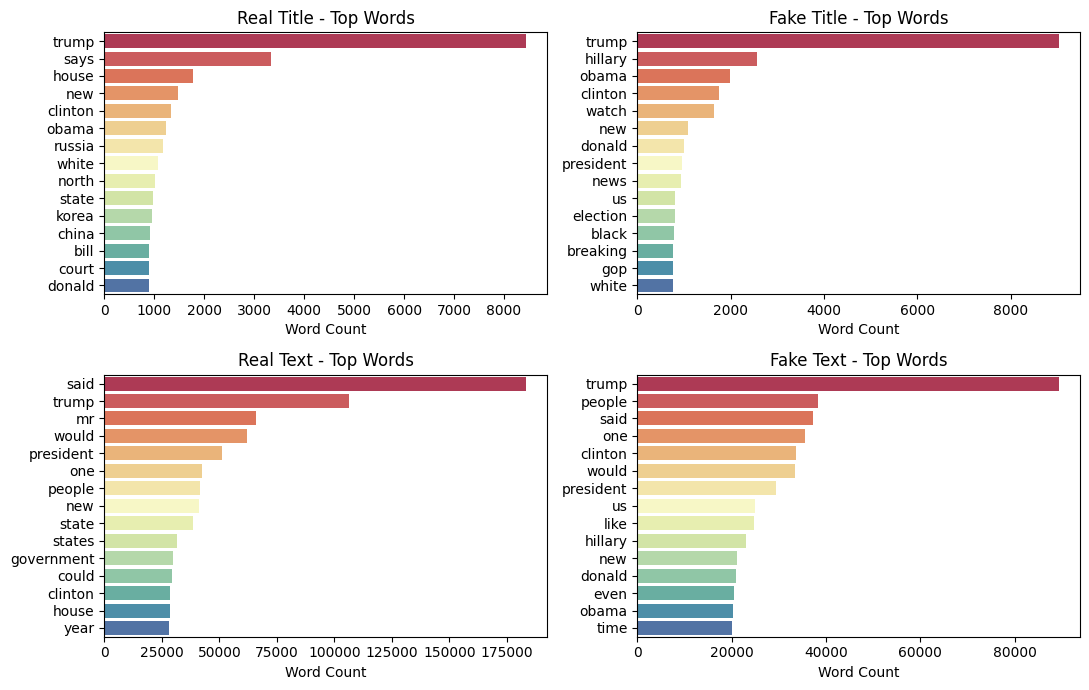

In [14]:
# use barplots to show top words for title and text for each label
# I am using the tokenized text columns
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

# I choose to show the top 15 words
words, freq = get_top_n_words(0, 'title_tokens_to_text', 15)
sns.barplot(x=freq, y=words, hue=words, palette='Spectral', ax=ax1)
ax1.set_title('Real Title - Top Words')
ax1.set_xlabel('Word Count')

words, freq = get_top_n_words(1, 'title_tokens_to_text', 15)
sns.barplot(x=freq, y=words, hue=words, palette='Spectral', ax=ax2)
ax2.set_title('Fake Title - Top Words')
ax2.set_xlabel('Word Count')

words, freq = get_top_n_words(0, 'text_tokens_to_text', 15)
sns.barplot(x=freq, y=words, hue=words, palette='Spectral', ax=ax3)
ax3.set_title('Real Text - Top Words')
ax3.set_xlabel('Word Count')

words, freq = get_top_n_words(1, 'text_tokens_to_text', 15)
sns.barplot(x=freq, y=words, hue=words, palette='Spectral', ax=ax4)
ax4.set_title('Fake Text - Top Words')
ax4.set_xlabel('Word Count')

plt.tight_layout()
plt.show()

**I don't see anything very informative from these lists except that Trump is extremely common in fake and real articles and titles. There is some common words I would probably want to ignore that was not caught with the stop_word lists.**

###Get Top Mentions and Hashtags

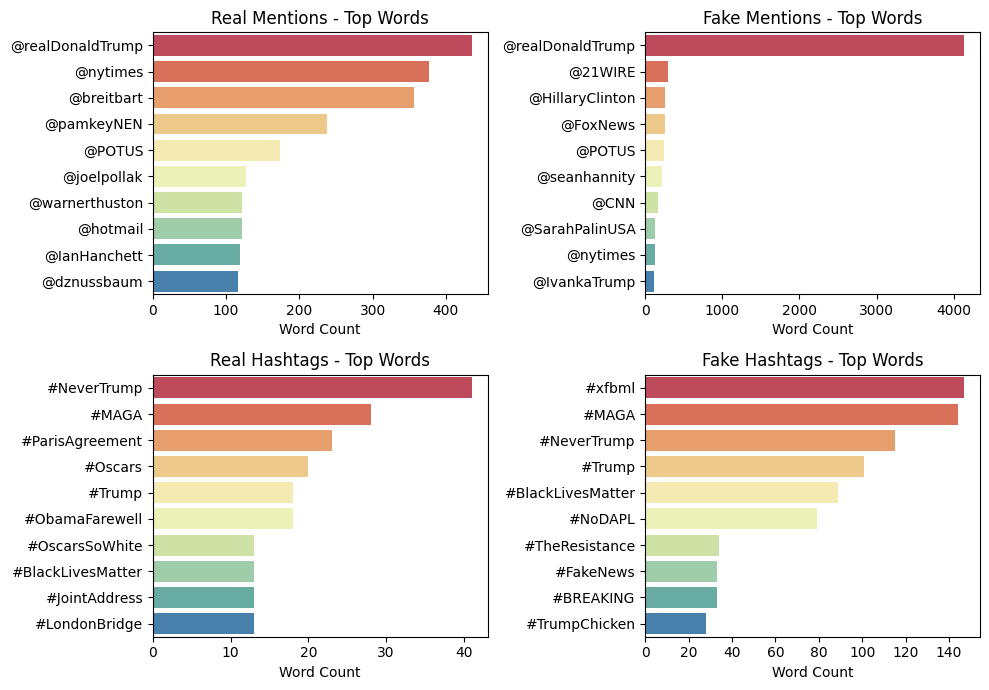

In [15]:
# did the same thing for mentions and hashtags as the above top words barplots
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(figsize=(10, 7), nrows=2, ncols=2)

words, freq = get_top_n_words(0, 'mentions', 10)
sns.barplot(x=freq, y=words, hue=words, palette='Spectral', ax=ax1)
ax1.set_title('Real Mentions - Top Words')
ax1.set_xlabel('Word Count')

words, freq = get_top_n_words(1, 'mentions', 10)
sns.barplot(x=freq, y=words, hue=words, palette='Spectral', ax=ax2)
ax2.set_title('Fake Mentions - Top Words')
ax2.set_xlabel('Word Count')

words, freq = get_top_n_words(0, 'hashtags', 10)
sns.barplot(x=freq, y=words, hue=words, palette='Spectral', ax=ax3)
ax3.set_title('Real Hashtags - Top Words')
ax3.set_xlabel('Word Count')

words, freq = get_top_n_words(1, 'hashtags', 10)
sns.barplot(x=freq, y=words, hue=words, palette='Spectral', ax=ax4)
ax4.set_title('Fake Hashtags - Top Words')
ax4.set_xlabel('Word Count')

plt.tight_layout()
plt.show()

**I think the mentions and hashtag differences might be more informative than the top words lists. The data is too sparse for mentions and hashtags to really make and informed decisions from based on the skills I have now.**

###Top Bigrams in Text

In [16]:
# we are using CountVectorizer to extract the bigrams in hopes that they might be more informative than single words
cv_real = CountVectorizer(ngram_range=(2,2), stop_words='english')
# matrix of bigrams counts
bigrams_real = cv_real.fit_transform(data[data['label']==0]['text_tokens_to_text'])
cv_fake = CountVectorizer(ngram_range=(2,2), stop_words='english')
# matrix of bigrams counts
bigrams_fake = cv_fake.fit_transform(data[data['label']==1]['text_tokens_to_text'])

In [17]:
# totals of counts for each bigram
bigram_counts_real = bigrams_real.sum(axis=0)
bigram_counts_fake = bigrams_fake.sum(axis=0)

In [18]:
# creates a DataFrame of counts then sorts by value
bigrams_freq_real = pd.DataFrame([(word, bigram_counts_real[0, i]) for word, i in cv_real.vocabulary_.items()])
bigrams_freq_real.columns = ['bigram', 'count']
bigrams_freq_real.sort_values(by='count', ascending=False, inplace=True)
# creates a DataFrame of counts then sorts by value
bigrams_freq_fake = pd.DataFrame([(word, bigram_counts_fake[0, i]) for word, i in cv_fake.vocabulary_.items()])
bigrams_freq_fake.columns = ['bigram', 'count']
bigrams_freq_fake.sort_values(by='count', ascending=False, inplace=True)

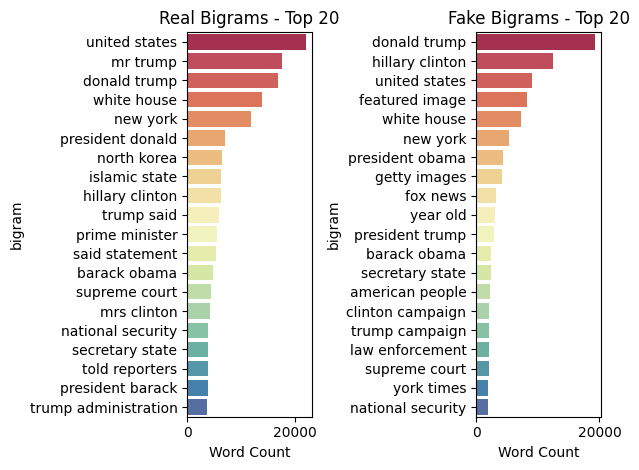

In [19]:
# create barplots of top bigrams
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.barplot(x='count', y='bigram', hue='bigram', palette='Spectral', data=bigrams_freq_real.head(20), ax=ax1)
ax1.set_title('Real Bigrams - Top 20')
ax1.set_xlabel('Word Count')
sns.barplot(x='count', y='bigram', hue='bigram', palette='Spectral', data=bigrams_freq_fake.head(20), ax=ax2)
ax2.set_title('Fake Bigrams - Top 20')
ax2.set_xlabel('Word Count')
plt.tight_layout()
plt.show()

**There are some differences in bigrams that might be predictive, but for the most part the bigrams are similar. I think the bigrams are more informative of the time period the articles are from (2016-2017 range).**

###Correlation Matrix

**Some observations from the correlation matrix**

'text_sent_count' and 'total_word_count' are highly correlated, therefore only one of the two should be used in a final model. If both variable were used there will be issues with collinearity.

'non_recog_word_count' is somewhat correlated to both 'text_sent_count' and 'total_word_count' and should not be included with either one of those variables. 'non_recog_word_count' is used to calculate 'non_word_percent' which is not strongly correlated to any other variables so 'non_word_percent' would be ok to leave in the model.

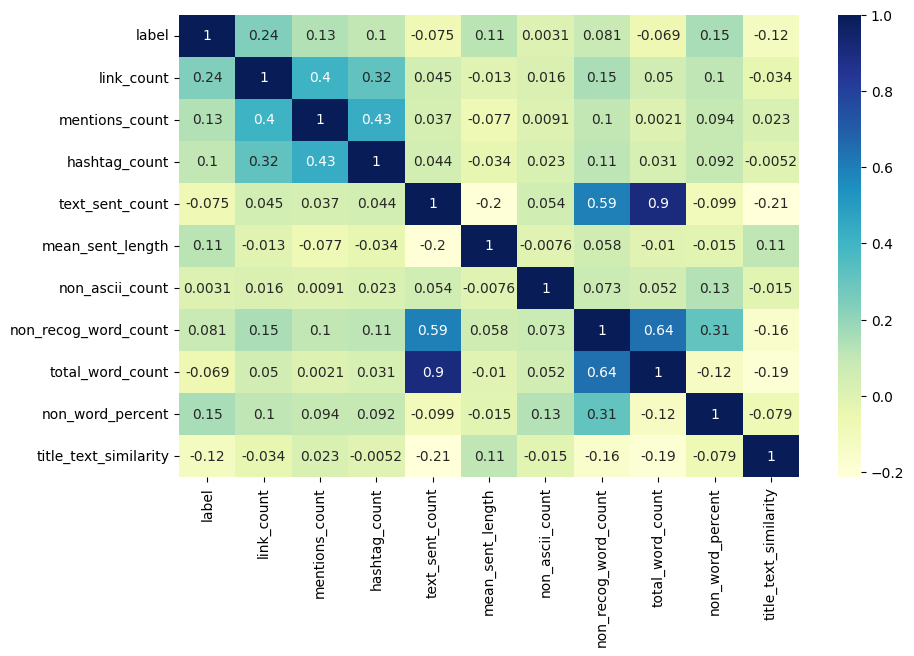

In [20]:
# display correlation matrix
fig, ax = plt.subplots(figsize=(10, 6))  # Width, Height in inches
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

###Pairplot

**Some observations from the pairplot**

The same observations about correlation and collinearity that are observed in the correlation matrix can be seen in the pairplot. The pairplot also color codes the points by label. Based on the pairplot, the labels do not appear to be easily separatable.

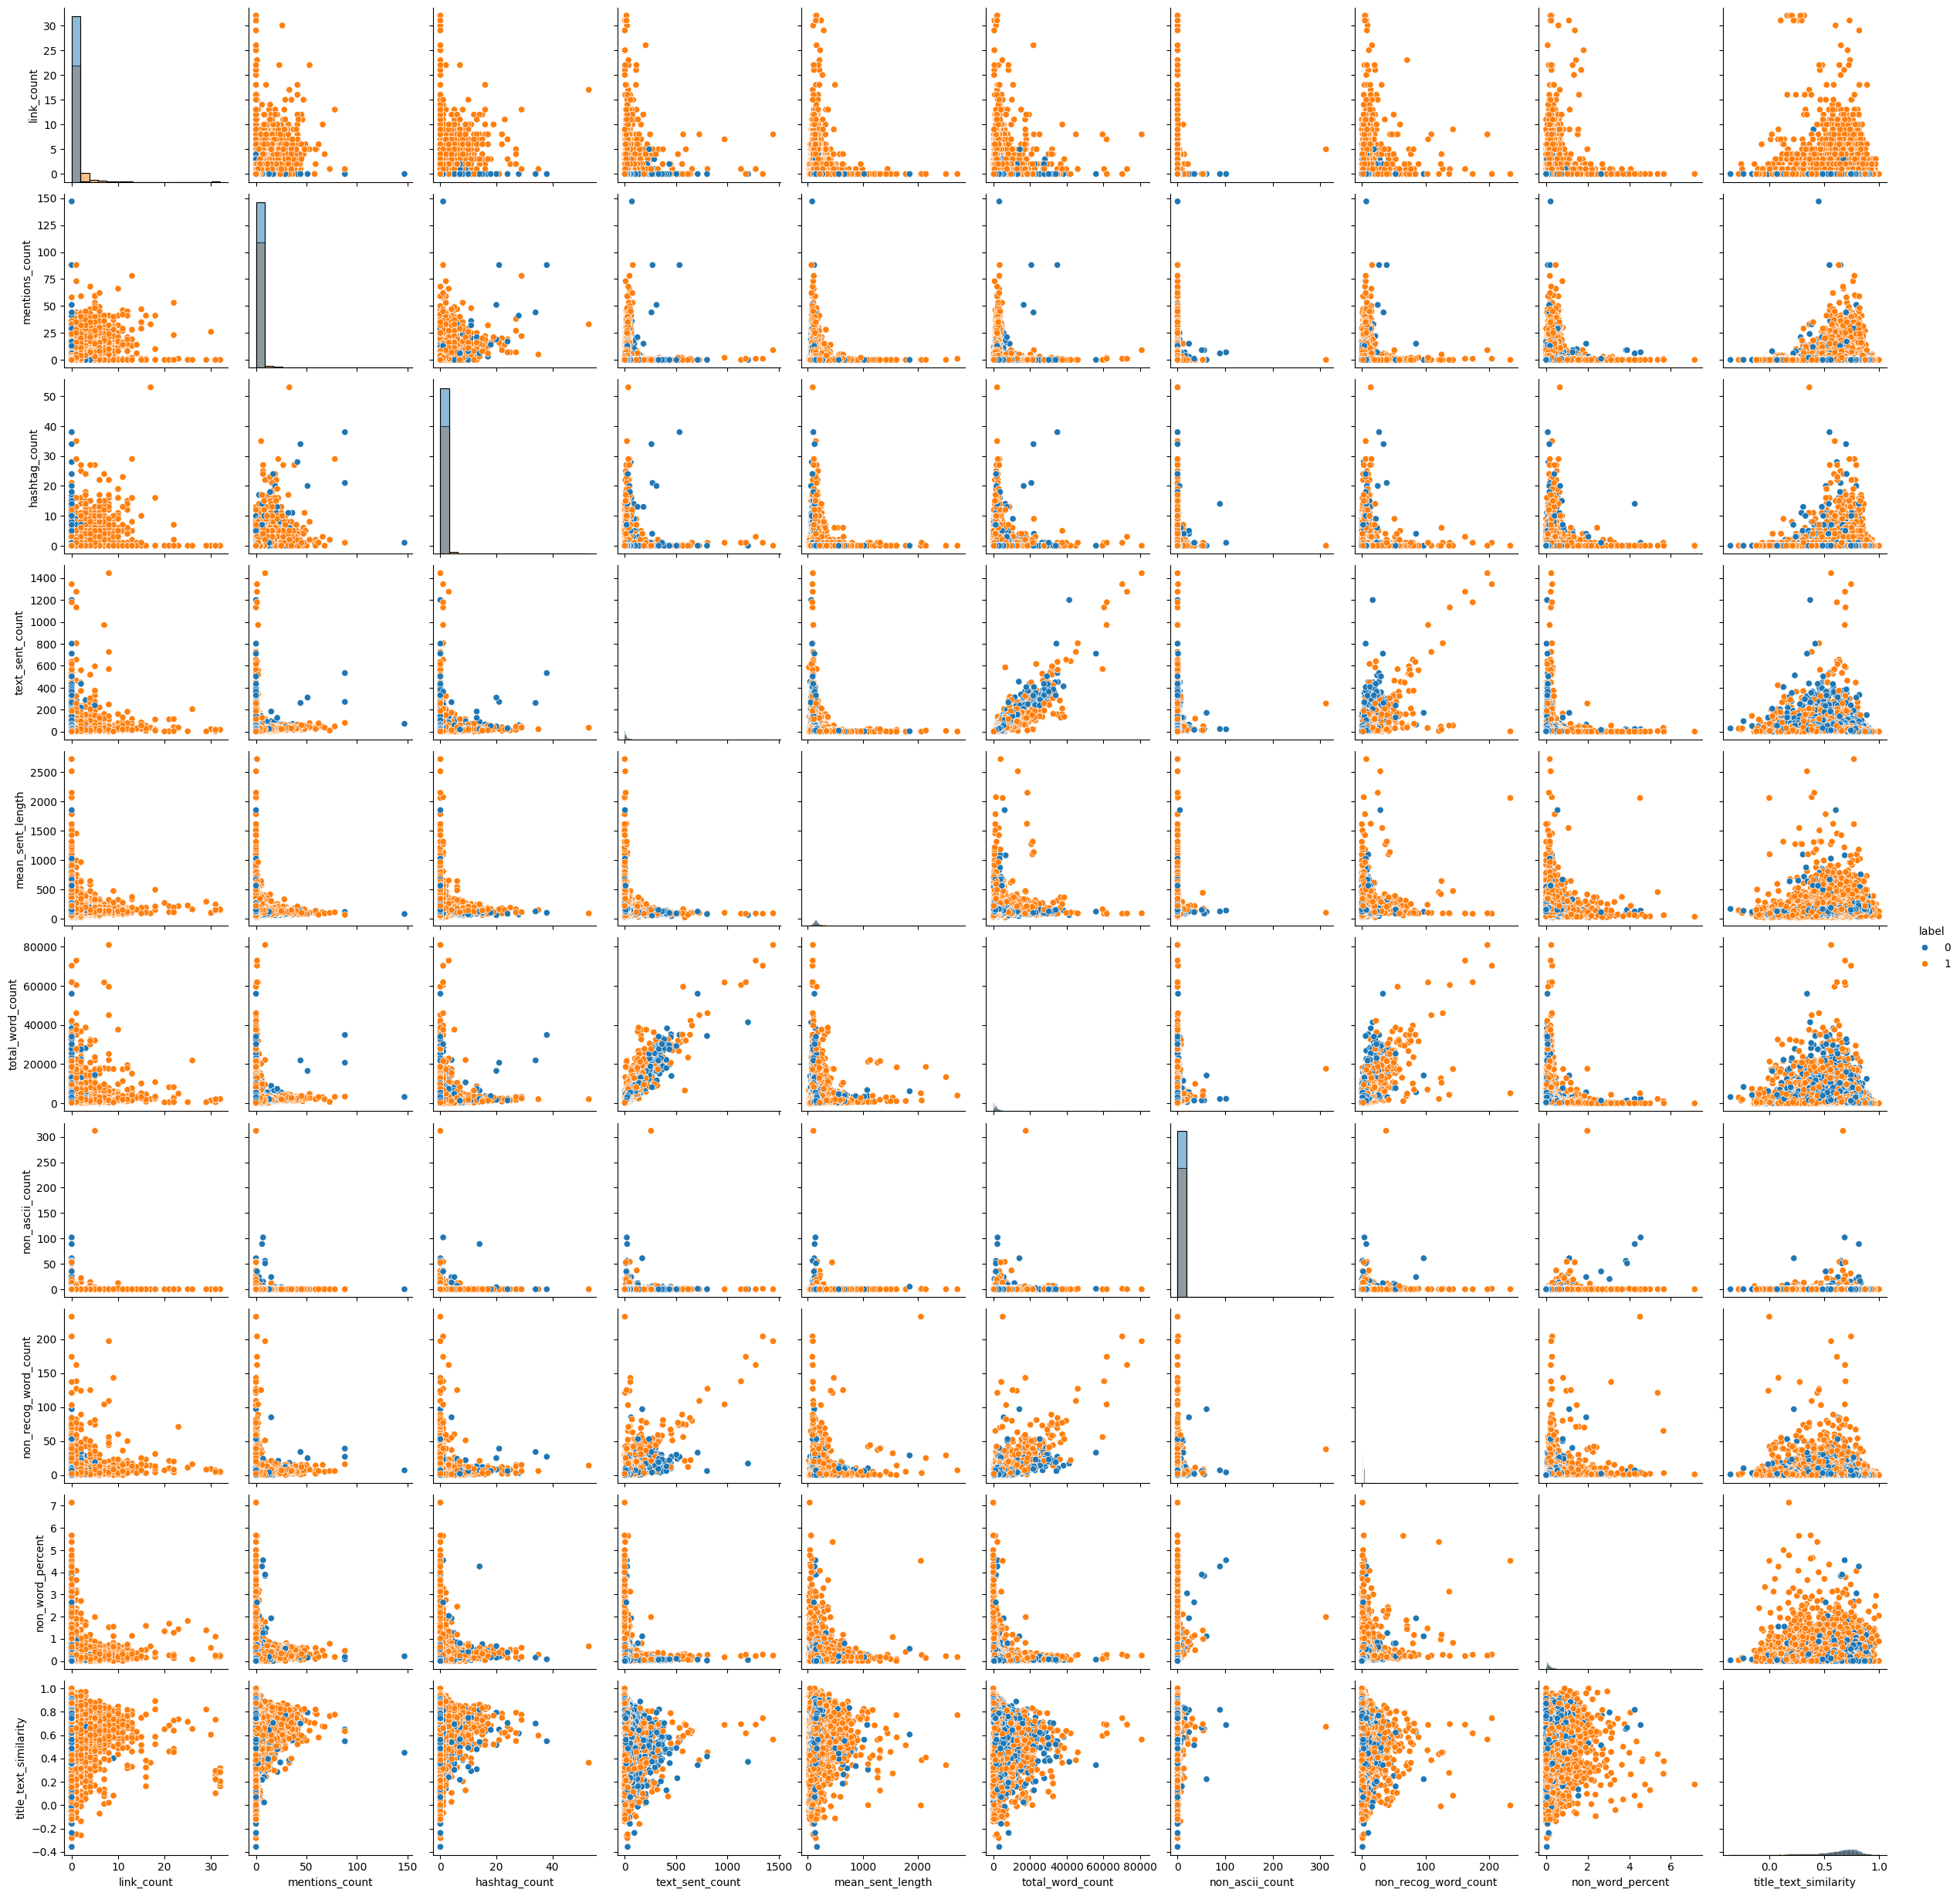

In [21]:
# pick features to display in pair plot - we are looking at the non-text columns
features = ['link_count', 'mentions_count', 'hashtag_count', 'text_sent_count', 'mean_sent_length','total_word_count','non_ascii_count','non_recog_word_count','non_word_percent','title_text_similarity']
sns.pairplot(data, vars=features, hue='label', diag_kind="hist")
plt.show()

##Feature Selection, Vectorization, Model Choice

In [32]:
import time
import gensim.downloader as api

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

from pprint import pprint
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

###**Decision to use Word2Vec for Text Vectorization**

Text columns must be converted into numerical vectors to enable machine learning algorithms to process the data. There will be a loss of information regardless of the vectorization method used.

<br>

TF-IDF (term frequency-inverse document frequency) is a popular method that assigns weights to words based on the frequency in the document and the rarity across the entire corpus. TF-IDF reduces the emphasis on common words while highlighting less frequent, more distinctive terms. This approach is more easily interpretable but lacks the ability to capture semantic meaning or contextual relationships. TF-IDF vectors are considered, meaning they contain a large number of zero values. The sparsity can contribute to overfitting. Sparse datasets often have a large number of features which may be irrelevant to future predictions.

<br>

Word embeddings, such as Word2Vec, use more complex algorithms and can show how words are related semantically and grammatically. Rarely occurring words can disrupt embeddings. Therefore, it can be helpful to use pretrained models or domain specific training. Word2Vec represents words in a dense low-dimensional space with usually 100-300 dimensions compared to the sparse high-dimensional TF-IDF. The reduced dimensionality reduces the risk of overfitting. Using pretrained Word2Vec models such as the Google News model can improve generalizations of machine learning, especially on unseen data.

<br>

**I am choosing to use word2vec method and use the pretrained google news model for this project.**

###Load google news word2vec model

**Google News model contains 300-dimensional vectors for 3 million words and phrases.**

In [21]:
# method to handle errors in downloading word2vec google new model
def download_w2v_model(model_name):

  attempts = 0
  max_attempts = 3
  # loop to try to load google news model
  while attempts < max_attempts:
    try:
      model = api.load(model_name)
      return model

    # if there is an exception add to attempts count and try again
    except Exception as e:
      print(f"Error downloading {model_name}: {e}")
      attempts += 1
      print(f"Download attempt {attempts} failed. Retrying...")

  print('Failed to download')
  return None

# load google news word2vec model
model_google = download_w2v_model("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [22]:
# method for w2v vertorization with pretrained model
def w2v_vectorize(text, model):
  words = text.split()
  # word is in vocabulary retrieve corresponding word embedding
  words_vecs = [model[word] for word in words if word in model]
  # placeholder for text with no recognized words
  if len(words_vecs) == 0:
    return np.zeros(100)
  # convert to np array
  words_vecs = np.array(words_vecs)
  # returns vector that is the averages of words_vecs
  return words_vecs.mean(axis=0)

###Select Features

**I wanted to look at the non-text features and run RFECV, which is recursive feature elimination with cross validation**

In [23]:
# dataframe of features to test
X = data[['text_clean_ascii','link_count','mentions_count','hashtag_count','mean_sent_length','non_ascii_count','non_recog_word_count','total_word_count','non_word_percent','title_text_similarity']]
y = data['label']
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61598 entries, 0 to 61597
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   text_clean_ascii       61598 non-null  object 
 1   link_count             61598 non-null  int64  
 2   mentions_count         61598 non-null  int64  
 3   hashtag_count          61598 non-null  int64  
 4   mean_sent_length       61598 non-null  float64
 5   non_ascii_count        61598 non-null  int64  
 6   non_recog_word_count   61598 non-null  int64  
 7   total_word_count       61598 non-null  int64  
 8   non_word_percent       61598 non-null  float64
 9   title_text_similarity  61598 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 4.7+ MB
None


In [24]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)

In [26]:
# create a decision tree classifier
estimator = DecisionTreeClassifier()

# use RFE with cross-validation to find best number of features
selector = RFECV(estimator, cv=5)
selector = selector.fit(X_train.drop('text_clean_ascii', axis=1), y_train)

# display best number of features
print("Optimal number of features: %d" % selector.n_features_)

# display selected features
print("Selected features: %s" % selector.support_)

Optimal number of features: 9
Selected features: [ True  True  True  True  True  True  True  True  True]


###**Preliminary Model choices**

**Logistic Regression**
* Efficient with large dataset
* Not sensitive to feature scaling

**SGD Classifier**
* Fast to train and good with large datasets
* Supports online learning

**Random Forest**
* Handles non-linear relationships
* Performs better on dense data which is why it is important that we use word2vec vectorization method

**SVM**
* Good with high-dimensional text data
* Can adapt to different types of data distributions

In [27]:
# we are going to loop through some ML models
def run_models(X_train_df, y_train_df, X_test_df, y_test_df):
  models = {
    'Logistic Regression': LogisticRegression(max_iter=3000),
    'SGD Classifier': SGDClassifier(alpha=0.0001, loss='modified_huber', max_iter=2000, n_iter_no_change=1000, penalty='l2', tol=0.001),
    'Random Forest': RandomForestClassifier(),
    'Suport Vector Machine': SVC(probability=True)
  }

  # Loop through models and record time, accuracy and classification report
  for model_name, model in models.items():
    # record time it take to run
    start_time = time.time()

    # fit model
    model.fit(X_train_df, y_train_df)
    # predit label
    y_pred = model.predict(X_test_df)

    end_time = time.time()

    # print accuracy and time
    print(f'{model_name} Accuracy: {accuracy_score(y_test_df, y_pred):.4f} Time: {end_time - start_time:.2f} seconds')
    # print classification report
    print(classification_report(y_test_df, y_pred))

    # Plot the ROC curve ( True positive rate v/s False positive rate) and indicate the AUC on the plot
    predicted = model.predict_proba(X_test_df)[:,-1]

    # display roc curve and auc score
    fpr, tpr, thresholds = roc_curve(y_test, predicted)
    roc_auc = roc_auc_score(y_test, predicted)

    plt.figure(figsize = (5,3))
    plt.plot(fpr, tpr, lw=2, label = 'ROC curve (area (AUC) = %0.2f)' % roc_auc)
    plt.xlabel("false positive rate", fontsize=10)
    plt.ylabel("true positive rate", fontsize=10)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title("ROC curve " + model_name, fontsize=16)
    plt.legend()
    plt.show()

###**Vectorize Training and Test Data**

**We are going to combine the 'text_clean_ascii' vectorized by word2vec with the 9 features recommended above. We will then loop through some ML models. There is a little manipulation that needs to hap to the dataframe to send it through a columntransformer to scale the non-text features that we are adding.**

In [28]:
# create the vectorized np array of word embeddings
X_train_w2v_google = np.array([w2v_vectorize(row, model_google) for row in X_train['text_clean_ascii']])
X_test_w2v_google = np.array([w2v_vectorize(row, model_google) for row in X_test['text_clean_ascii']])

# Creating a new DataFrame for the Word2Vec embeddings and concatenate with x_train df
# this is to combine the word embeddings with the non-text features from dataset
X_train_w2v_df = pd.DataFrame(X_train_w2v_google)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_w2v_df], axis=1)

# do the same with the x_test df
X_test_w2v_df = pd.DataFrame(X_test_w2v_google)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_w2v_df], axis=1)

# check things are working
print(X_train.head())

# drop the text column
X_train.drop('text_clean_ascii', axis=1, inplace=True)
X_test.drop('text_clean_ascii', axis=1, inplace=True)

# check things are working
print(X_train.head())

                                    text_clean_ascii  link_count  \
0  washington met neil gorsuch capitol last week ...           0   
1  comments arrived almost two hours late still t...           1   
2  republican senator bob corker said friday supp...           0   
3  new york loves hillary clinton really turned s...           0   
4  yahoo inc yhoo came renewed scrutiny federal i...           1   

   mentions_count  hashtag_count  mean_sent_length  non_ascii_count  \
0               0              0        177.969697                0   
1               2              1         75.640000                1   
2               0              0        205.000000                0   
3               0              0        165.200000                0   
4               0              0        181.193548                0   

   non_recog_word_count  total_word_count  non_word_percent  \
0                     1              4044          0.024728   
1                     4              1

Logistic Regression Accuracy: 0.8906 Time: 0.33 seconds
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8688
           1       0.88      0.86      0.87      6712

    accuracy                           0.89     15400
   macro avg       0.89      0.89      0.89     15400
weighted avg       0.89      0.89      0.89     15400



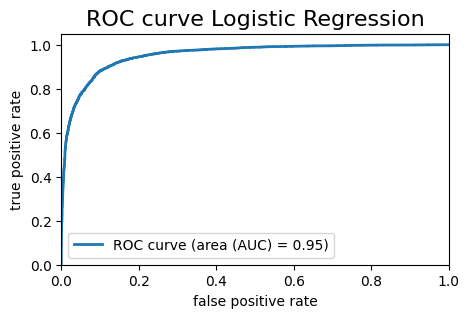

SGD Classifier Accuracy: 0.8984 Time: 46.85 seconds
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      8688
           1       0.89      0.88      0.88      6712

    accuracy                           0.90     15400
   macro avg       0.90      0.90      0.90     15400
weighted avg       0.90      0.90      0.90     15400



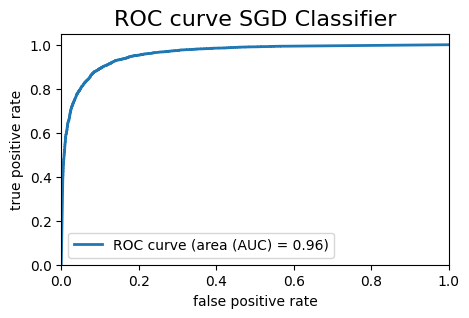

Random Forest Accuracy: 0.8813 Time: 120.61 seconds
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      8688
           1       0.87      0.85      0.86      6712

    accuracy                           0.88     15400
   macro avg       0.88      0.88      0.88     15400
weighted avg       0.88      0.88      0.88     15400



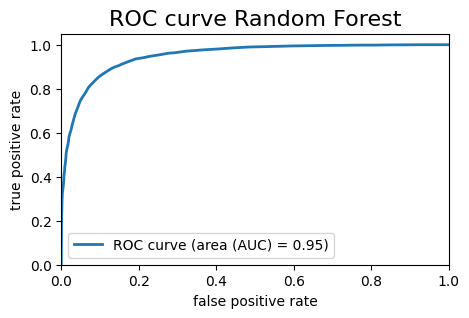

Suport Vector Machine Accuracy: 0.9152 Time: 1222.24 seconds
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      8688
           1       0.91      0.90      0.90      6712

    accuracy                           0.92     15400
   macro avg       0.91      0.91      0.91     15400
weighted avg       0.92      0.92      0.92     15400



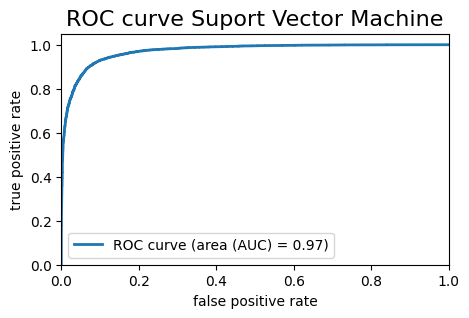

In [29]:
# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# set up the columntransformer which helps scale the non-text data
# we will passthrough on the word embedding data
preprocessor = ColumnTransformer(
    transformers = [
        ('link_count', MinMaxScaler(), ['link_count']),
        ('mentions_count', MinMaxScaler(), ['mentions_count']),
        ('hashtag_count', MinMaxScaler(), ['hashtag_count']),
        ('mean_length', MinMaxScaler(), ['mean_sent_length']),
        ('non_ascii', MinMaxScaler(), ['non_ascii_count']),
        ('non_recog', MinMaxScaler(), ['non_recog_word_count']),
        ('total_words', MinMaxScaler(), ['total_word_count']),
        ('non_word_per', MinMaxScaler(), ['non_word_percent']),
        ('similarity', MinMaxScaler(), ['title_text_similarity']),
    ],
    remainder='passthrough'  # This keeps 'word2vec' unchanged
)
# fit and transform the train data and transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# run the models with the data
run_models(X_train_transformed, y_train, X_test_transformed, y_test)

###Oversampling with SMOTE

 **We want to oversample to balance dataset and hopefully improve the recall difference between labels.**

In our clean dataset, we have an imbalance between the classes. We want to use SMOTE to generate synthetic data points for the minority class to improve performance for the minority class. SMOTE needs to be applied after the text has been converted to vectors by using word2vec. SMOTE generates synthetic samples with similar semantic meaning to examples in the minority class. The improvement to our models is not drastic but we didn't have much of a disparity to begin with.


Logistic Regression Accuracy: 0.8912 Time: 0.29 seconds
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8688
           1       0.87      0.88      0.88      6712

    accuracy                           0.89     15400
   macro avg       0.89      0.89      0.89     15400
weighted avg       0.89      0.89      0.89     15400



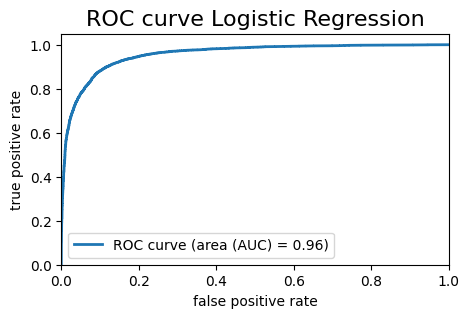

SGD Classifier Accuracy: 0.8964 Time: 52.17 seconds
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      8688
           1       0.87      0.89      0.88      6712

    accuracy                           0.90     15400
   macro avg       0.89      0.90      0.89     15400
weighted avg       0.90      0.90      0.90     15400



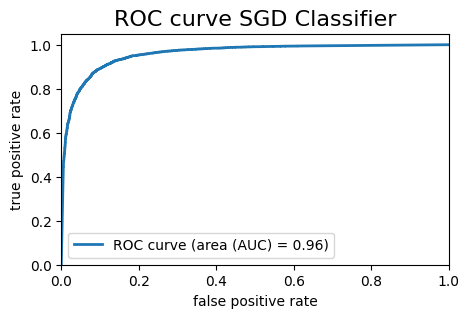

Random Forest Accuracy: 0.8801 Time: 132.96 seconds
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8688
           1       0.86      0.86      0.86      6712

    accuracy                           0.88     15400
   macro avg       0.88      0.88      0.88     15400
weighted avg       0.88      0.88      0.88     15400



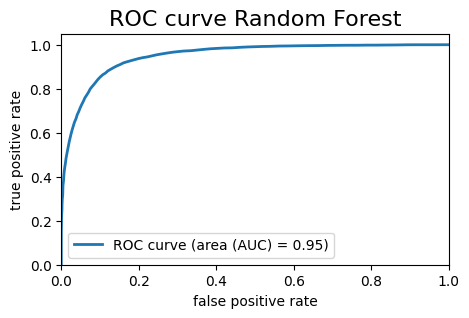

Suport Vector Machine Accuracy: 0.9156 Time: 1539.90 seconds
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      8688
           1       0.90      0.91      0.90      6712

    accuracy                           0.92     15400
   macro avg       0.91      0.92      0.91     15400
weighted avg       0.92      0.92      0.92     15400



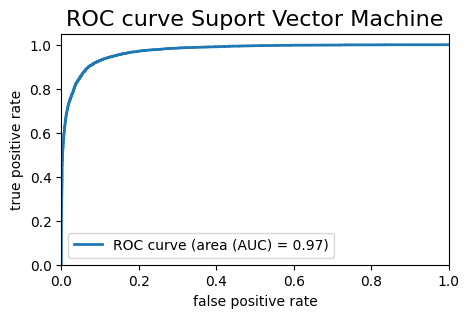

In [30]:
# over sample with smote
smote = SMOTE(random_state=29)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

run_models(X_train_resampled, y_train_resampled, X_test_transformed, y_test)

**Accuracy scores did not always improve and there is not much difference in any of the numbers. The main difference can be seen in the recall score. The difference in recall score between the two labels has decreased after we included oversampling.**

##Conclusion and Next Steps

**I learned a lot from this project. Initially, I used a TF-IDF vectorizer, which gave me higher accuracy scores. However, with around 200,000 features, I believed the model was overfitting to the data. This insight prompted me to look into the word2vec word embeddings. My scores went down but my models were more reliable, and I think more predictive of current new articles. I chose prioritizing generalizability over optimizing accuracy.**

**Next Steps:**
* Work on parameter tuning – my computer kept crashing when using gridsearch
* Use my knowledge gained on word2vec and play around more with context and meaning.
* I want to create a book recommendation model and I think the knowledge gained from working on this project will help me.


